In [1]:
from sympy import *
init_printing # facilita la impresión de las expresiones matemáticas

<function sympy.interactive.printing.init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Balance de materia en estado no estacionario

## <font style="color:red">Ejemplo 1</font>

<img src="BMNE1.png" alt="Balance de materia en estado no estacionario">

$
Q_e = Q_s = Q
$

$
V \frac{dC}{dt} = Q (C_e - C_s)
$

$
(C_e - C_s) = y
$ <br>

$
-\frac{dC}{dt} =  \frac{dy}{dt}
$ <br>

$
 \frac{dC}{dt} =  -\frac{dy}{dt}
$

$
-\frac{dy}{dt} = \frac{Q}{V} y
$

$
\frac{dy}{dt} = -\frac{Q}{V} y
$<br>

$
\int_{y_0}^{y_t} \frac{1}{y} dy= -\frac{Q}{V} \int_{t_0}^{t} dt
$<br>

$
ln \left( \frac{y_t}{y_0} \right)= -\frac{Q}{V} (t-t_0)
$ <br>

$
ln \left( \frac{C_t - C_e}{C_0 - C_e} \right)= -\frac{Q}{V} (t-t_0)
$ <br>

$
\frac{C_t - C_e}{C_0 - C_e} = e^{-\frac{Q}{V} (t-t_0)}
$ <br>

$
{C_t } = ({C_0 - C_e}) e^{-\frac{Q}{V} (t-t_0)} + C_e
$ <br>

### <font style="color:green"> Representación con sympy</font>

In [3]:
V = 1 # en m3
Q = 1.1 # en m3/d
t = symbols("t")
C = Function("C")
Ce = 0.1 # g/d

In [4]:
C(t)

C(t)

In [5]:
t

t

In [6]:
eq1 = Eq(V*C(t).diff(t,1), Q*(Ce-C(t)))

In [7]:
eq1

Eq(Derivative(C(t), t), 0.11 - 1.1*C(t))

In [8]:
ci1 = {C(0):0} # Asignamos a C0 un valor de 0 g/m3

In [9]:
solucion1 = dsolve(eq1, C(t),ics=ci1)  #En este primer caso C0 se asume como 0 g/m3

In [10]:
solucion1 

Eq(C(t), 0.1 - 0.1*exp(-1.1*t))

<a href="https://www.tutorialspoint.com/sympy/sympy_plotting.htm">graficos sympy</a> <br>

<a href="https://www.cfm.brown.edu/people/dobrush/am33/SymPy/part1.html">graficos sympy 2</a> 

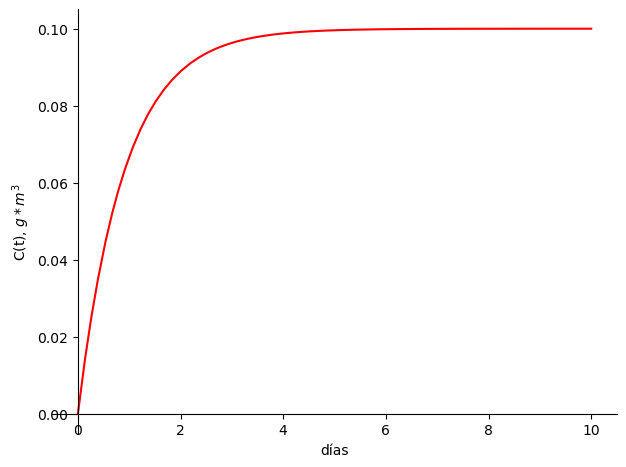

In [11]:
plot(solucion1.rhs, (t,0,10),  line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

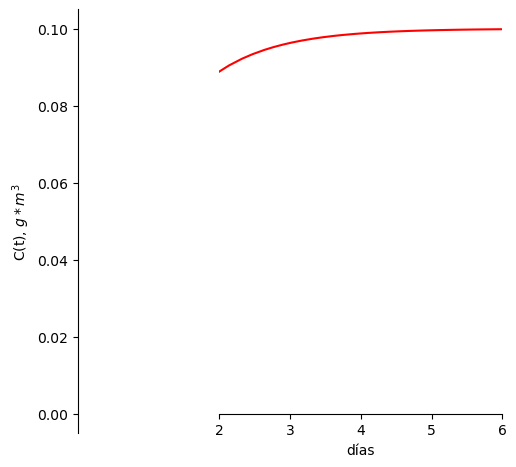

In [12]:
plot(solucion1.rhs, (t,0,10), xlim=(2,6), line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

In [13]:
# Analicemos las concentraciones dentro del recipiente en los primeros 20 días
for i in range(11): 
    display(solucion1.subs(t,i).evalf())

Eq(C(0), 0)

Eq(C(1), 0.0667128916301921)

Eq(C(2), 0.0889196841637666)

Eq(C(3), 0.096311683259876)

Eq(C(4), 0.0987722660096932)

Eq(C(5), 0.0995913228561536)

Eq(C(6), 0.0998639631962452)

Eq(C(7), 0.0999547172817113)

Eq(C(8), 0.0999849266924905)

Eq(C(9), 0.0999949825317944)

Eq(C(10), 0.099998329829921)

## <font style="color:red">Ejemplo 2</font>

<img src="BMNE2.png" alt="Balance de materia en estado no estacionario">

### <font style="color:green"> Vamos a representarlo con sympy basandonos en el caso anterior</font>

In [14]:
ci2 = {C(0):0.05} #Asignamos C0 un valor de 0.05 g/m3

In [15]:
solucion2 = dsolve(eq1, C(t),ics=ci2)  #En este primer caso C0 se asume como 0.05 g/m3

In [16]:
solucion2

Eq(C(t), 0.1 - 0.05*exp(-1.1*t))

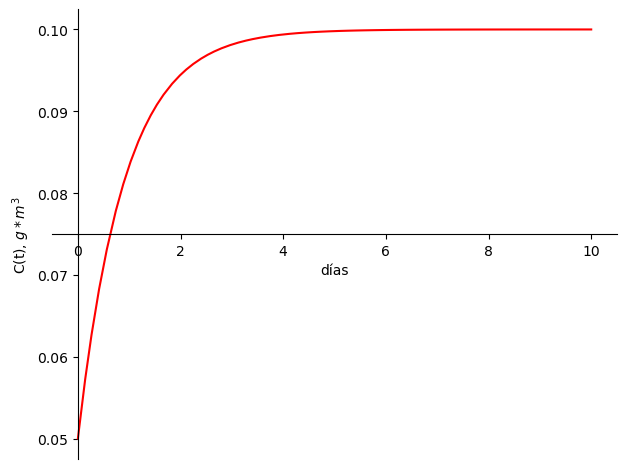

In [17]:
plot(solucion2.rhs, (t,0,10),line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

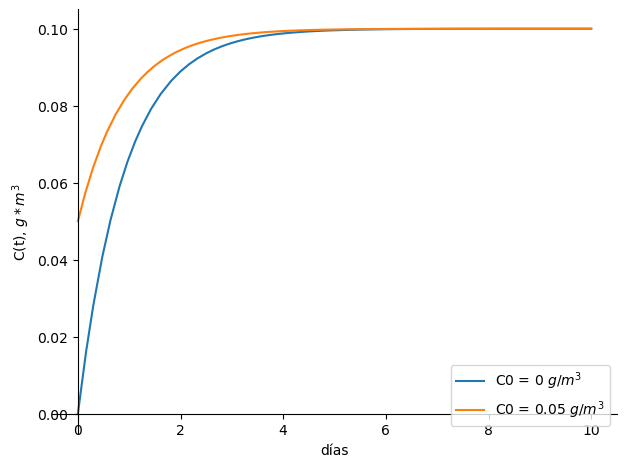

In [18]:
p1 = plot(solucion1.rhs ,(t,0,10), ylabel="C(t), $g*m^3$", xlabel ="días", legend=True, show=False)
p2 = plot(solucion2.rhs,  (t,0,10), ylabel="C(t), $g*m^3$", xlabel ="días", legend=True , show=False)

p1[0].label = 'C0 = 0 $g/m^3$'
p2[0].label = 'C0 = 0.05 $g/m^3$'

p1.append(p2[0])

p1.show()

## <font style="color:red">Ejemplo 3</font>

<img src="BMNE3.png" alt="Balance de materia en estado no estacionario">

In [19]:
ci3 = {C(0):1} #C0 es de 1 g/m3

In [20]:
solucion3 = dsolve(eq1, C(t),ics=ci3)  #En este primer caso C0 se asume como 1 g/m3

In [21]:
solucion3

Eq(C(t), 0.1 + 0.9*exp(-1.1*t))

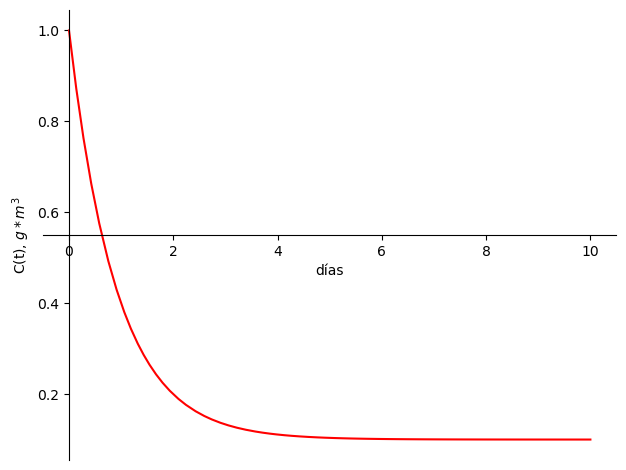

In [22]:
plot(solucion3.rhs, (t,0,10),line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

## <font style="color:red">Ejemplo 4</font>

<img src="BMNE4.png" alt="Balance de materia en estado no estacionario">

In [23]:
V = 1 # en m3
Q = 0.1+0.3# en m3/d
t = symbols("t")
C = Function("C")
Ce = 0.1 + 0.4 # g/d

In [24]:
eq4 = Eq(V*C(t).diff(t,1), Q*(Ce-C(t)))
eq4

Eq(Derivative(C(t), t), 0.2 - 0.4*C(t))

In [25]:
ci4 = {C(0):0.2} #C0 es de 0.2 g/m3

In [26]:
solucion4 = dsolve(eq4, C(t),ics=ci4)
solucion4

Eq(C(t), 0.5 - 0.3*exp(-0.4*t))

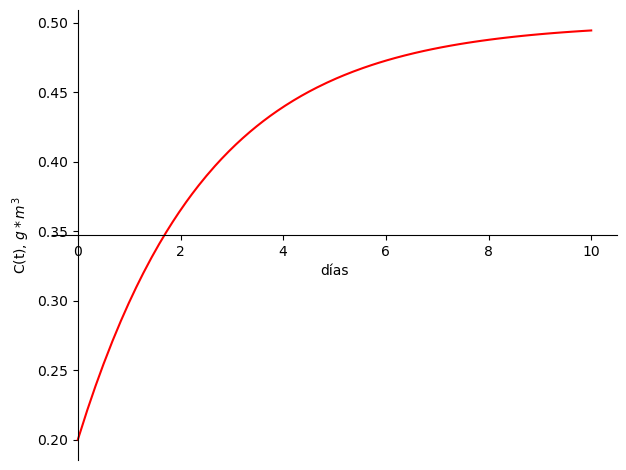

In [27]:
plot(solucion4.rhs, (t,0,10),line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

## <font style="color:red">EJEMPLO 5</font>

<img src="BMNE5.png" alt="Balance de materia en estado no estacionario">

In [28]:
v = Function('v')(symbols('t'))
c = Function('c')(symbols('t'))

In [29]:
cEntrada = 0.1
qEntrada = 0.5
qSalida = 0.1

In [30]:
v.diff()

Derivative(v(t), t)

In [31]:
Ecuacion = Eq(1*v.diff() + 0.1*c.diff(),cEntrada*qEntrada - c*qSalida)

In [32]:
Ecuacion

Eq(0.1*Derivative(c(t), t) + Derivative(v(t), t), 0.05 - 0.1*c(t))

Verifiquemos la ecuación

$
\frac{dV}{dt} = 0.5 \frac{m^3}{d} - 0.1 \frac{m^3}{d}
$

$
\frac{dV}{dt} = 0.4 \frac{m^3}{d}
$

$
\int_{V_i}^{V_f} dV = 0.4 \frac{m^3}{d} \int_{t_i}^{t_f} dt
$

$
V_f - V_i = 0.4\frac{m^3}{d} (t_f - t_i)
$

$
0.7 m^3 = 0.4\frac{m^3}{d}*t_f
$

$
t_f = 1.75 d
$

<hr>

$
V\frac{dC}{dt} = (0.5 \frac{m^3}{d} * 0.1 \frac{g}{m^3})-(0.1 \frac{m^3}{d}*C_s)
$

$
V\frac{dC}{dt} = (0.05 \frac{g}{d})-(0.1 \frac{m^3}{d}*C_s)
$

$
\frac{dC}{dt} = \frac{(0.05 \frac{g}{d})}{V} - \frac{(0.1 \frac{m^3}{d}*C_s)}{V}
$

$
\frac{dC}{dt} = \frac{(0.05 \frac{g}{d})}{1 m^3} - \frac{(0.1 \frac{m^3}{d}*C_s)}{1 m^3}
$

$
\frac{dC}{dt} = (0.05 \frac{g}{d * m^3}) - (0.1 \frac{1}{d}*C_s)
$

$
-\frac{dC}{dt} = (0.1 \frac{1}{d}*C_s) - (0.05 \frac{g}{d * m^3}) 
$

$
y = (0.1 \frac{1}{d}*C_s) - (0.05 \frac{g}{d * m^3}) 
$


$
\frac{dy}{dC}= 0.1
$

$
dy = 0.1dC
$

$
dC = 10dy
$

$
-10\frac{dy}{dt} = y
$

Integrando

$
-10*ln \left(\frac{y_t}{y_0} \right) = (t-t_0)
$

$
-10*ln \left(\frac{(0.1 \frac{1}{d}*C_t) - (0.05 \frac{g}{d * m^3})}{- (0.05 \frac{g}{d * m^3})} \right) = (t-t_0)
$

$
ln \left(\frac{(0.1 \frac{1}{d}*C_t) - (0.05 \frac{g}{d * m^3})}{- (0.05 \frac{g}{d * m^3})} \right) = -\frac{(t-t_0)}{10}
$

$
(0.1 \frac{1}{d}*C_t) - (0.05 \frac{g}{d * m^3}) = - (0.05 \frac{g}{d * m^3}) * e^{-\frac{(t-t_0)}{10}}
$

$
(0.1 \frac{1}{d}*C_t) = - (0.05 \frac{g}{d * m^3}) * e^{-\frac{(t-t_0)}{10}}  + (0.05 \frac{g}{d * m^3})
$

$
C_t = - (0.5 \frac{g}{m^3}) * e^{-\frac{(t-t_0)}{10}}  + (0.5 \frac{g}{ m^3})
$

$
C_t = - (0.5 \frac{g}{m^3}) * e^{-\frac{(1.75 d)}{10 d}}  + (0.5 \frac{g}{ m^3})
$

$
C_t = 0.080 \frac{g}{m^3}
$

In [33]:
t = symbols("t")
C = Function("C")
V = 1

eqT = Eq(V*C(t).diff(t,1), 0.05 -0.1*C(t))
eqT

Eq(Derivative(C(t), t), 0.05 - 0.1*C(t))

In [34]:
ciT = {C(0):0} #C0 es de 0 g/m3

In [35]:
eqTSolved = dsolve(eqT, C(t),ics=ciT)

In [36]:
eqTSolved

Eq(C(t), 0.5 - 0.5*exp(-0.1*t))

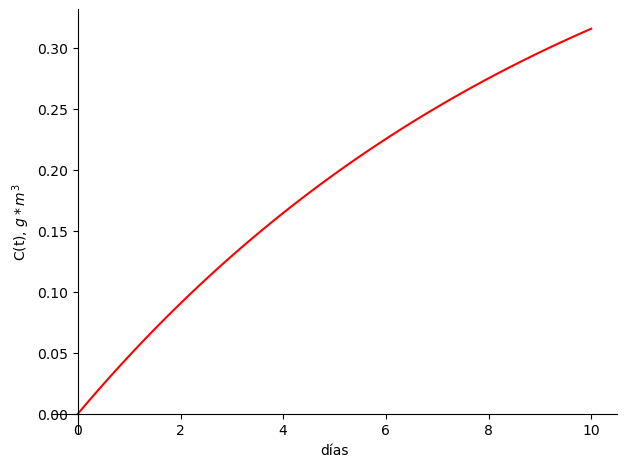

In [37]:
plot(eqTSolved.rhs, (t,0,10),  line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

In [38]:
rangot = np.linspace(0,10,40)

for i in range(40): 
    display(eqTSolved.subs(t,rangot[i]).evalf())

Eq(C(0.0), 0)

Eq(C(0.256410256410256), 0.0126575431459239)

Eq(C(0.512820512820513), 0.024994659494866)

Eq(C(0.769230769230769), 0.037019460678842)

Eq(C(1.02564102564103), 0.0487398529832034)

Eq(C(1.28205128205128), 0.0601635425450055)

Eq(C(1.53846153846154), 0.0712980404197794)

Eq(C(1.79487179487179), 0.0821506675200369)

Eq(C(2.05128205128205), 0.0927285594287582)

Eq(C(2.30769230769231), 0.103038671091024)

Eq(C(2.56410256410256), 0.113087781386882)

Eq(C(2.82051282051282), 0.122882497588443)

Eq(C(3.07692307692308), 0.132429259704158)

Eq(C(3.33333333333333), 0.141734344713105)

Eq(C(3.58974358974359), 0.150803870692099)

Eq(C(3.84615384615385), 0.159643800838307)

Eq(C(4.1025641025641), 0.168259947390051)

Eq(C(4.35897435897436), 0.176657975448334)

Eq(C(4.61538461538461), 0.18484340670164)

Eq(C(4.87179487179487), 0.192821623056433)

Eq(C(5.12820512820513), 0.200597870175749)

Eq(C(5.38461538461538), 0.208177260928213)

Eq(C(5.64102564102564), 0.215564778749739)

Eq(C(5.8974358974359), 0.22276528092013)

Eq(C(6.15384615384615), 0.229783501756733)

Eq(C(6.41025641025641), 0.236624055727242)

Eq(C(6.66666666666667), 0.243291440483704)

Eq(C(6.92307692307692), 0.249790039819715)

Eq(C(7.17948717948718), 0.256124126552759)

Eq(C(7.43589743589744), 0.262297865333575)

Eq(C(7.69230769230769), 0.268315315384412)

Eq(C(7.94871794871795), 0.274180433167955)

Eq(C(8.2051282051282), 0.279897074988696)

Eq(C(8.46153846153846), 0.285468999528446)

Eq(C(8.71794871794872), 0.29089987031766)

Eq(C(8.97435897435897), 0.296193258144205)

Eq(C(9.23076923076923), 0.301352643401144)

Eq(C(9.48717948717949), 0.306381418375092)

Eq(C(9.74358974358974), 0.311282889476632)

Eq(C(10.0), 0.316060279414279)

<hr>

$
V\frac{dC}{dt} = (0.5 \frac{m^3}{d} * 0.1 \frac{g}{m^3})-(0.1 \frac{m^3}{d}*C_s)-(0.4 \frac{m^3}{d}*C_s)
$

$
V\frac{dC}{dt} = (0.5 \frac{m^3}{d} * 0.1 \frac{g}{m^3})- C_s (0.1 \frac{m^3}{d} + 0.4 \frac{m^3}{d})
$

$
V\frac{dC}{dt} = (0.05 \frac{g}{d} )- C_s ( 0.5 \frac{m^3}{d})
$

$
\frac{dC}{dt} = \frac{(0.05 \frac{g}{d} )}{1 m^3}- \frac{C_s ( 0.5 \frac{m^3}{d})}{1m^3}
$

$
\frac{dC}{dt} = (0.05 \frac{g}{d*m^3} )- C_s ( 0.5 \frac{1}{d})
$

$
-\frac{dC}{dt} =  C_s ( 0.5 \frac{1}{d}) - (0.05 \frac{g}{d*m^3} )
$

$
y = C_s ( 0.5 \frac{1}{d}) - (0.05 \frac{g}{d*m^3} )
$

$
\frac{dy}{dC} = 0.5
$

$
dC = 2dy
$

$
-2 \frac{dy}{dt} = y
$

Integrando

Tomamos como $C_0$ a 0.08 $g/m^3$ del ejercicio anterior

$
-2 * ln \left( \frac{C_t ( 0.5 \frac{1}{d}) - (0.05 \frac{g}{d*m^3} )}{0.08 * ( 0.5 \frac{1}{d}) - (0.05 \frac{g}{d*m^3} )} \right) = t - t_0
$

$
C_t = 2(-0.01*e^{-\frac{t-t_0}{2}} + 0.05)
$

$
C_t = (-0.02*e^{-\frac{t-t_0}{2}} + 0.1)
$

In [39]:
t = symbols("t")
C = Function("C")
V = 1

eqT2 = Eq(V*C(t).diff(t,1), 0.05 -0.5*C(t))
eqT2

Eq(Derivative(C(t), t), 0.05 - 0.5*C(t))

In [40]:
ciT = {C(0):0.08} #C0 es de 0 g/m3

In [41]:
eqTSolved2 = dsolve(eqT2, C(t),ics=ciT)
eqTSolved2

Eq(C(t), 0.1 - 0.02*exp(-0.5*t))

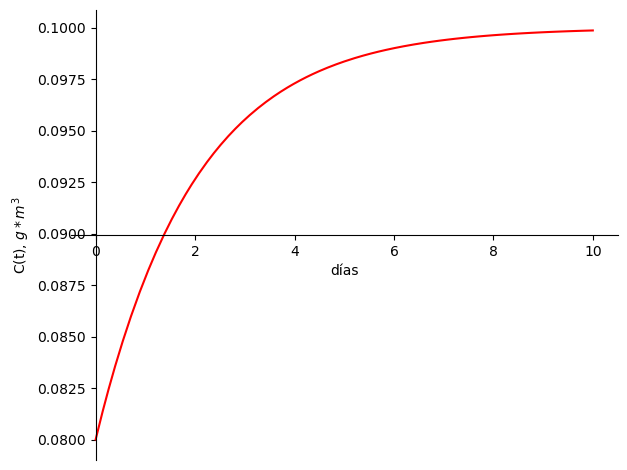

In [42]:
plot(eqTSolved2.rhs, (t,0,10),  line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

## <font style="color:red">EJEMPLO 6</font>

Con base en el siguiente esquema estime la velocidad en que cambia la altura del agua cada vez que se va llenando la sección cónica.

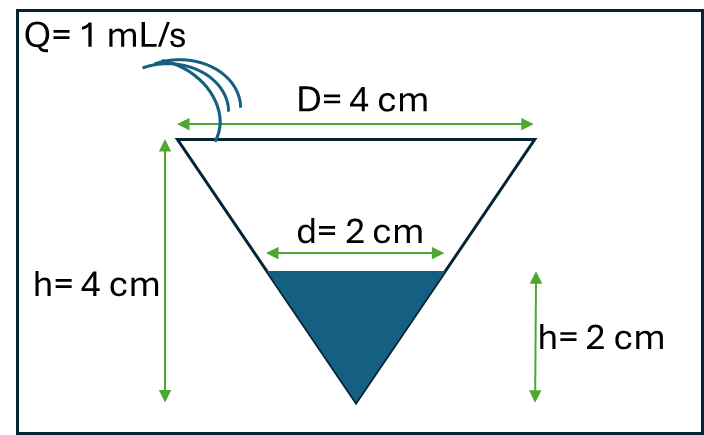

Recordemos que el volumen de un cono es:

$
V = \frac{1}{3} * \pi * r^2 * h 
$

La tasa de cambio del volumen es:

$
\frac{dV}{dt} = Q = 1 \frac{mL}{s}
$

Si:

$D=H$

$d=h$

Entonces:

$r=\frac{d}{2}=\frac{h}{2}$

Siendo $r$ el radio de la sección cónica con el volumen inicial de agua

$
V = \frac{1}{3} * \pi * \frac{h^2}{4} * h 
$

$
V = \frac{1}{3} * \pi * \frac{h^3}{4}
$

$
V = \frac{\pi}{12} * h^3
$

Nuestra ecuación quedaría:

$
\frac{dV}{dt} = \frac{\pi}{12} \frac{d h^3}{dt}
$

Para resolverla procedemos a:

$
\frac{dV}{dt} = \frac{\pi}{12} \frac{d h(t)^3}{dt}
$

Aplicamos regla de la cadena:

Regla de la cadena:
$
\frac{dy}{dx} = \frac{dy}{du}  * \frac{du}{dx}
$

Regla de la cadena:
$
\frac{d}{dx} (H(x)) = \frac{d}{dx} (f(g(x)))  * \frac{d}{dx}(g(x))
$

Regla de la cadena: $g(x)= u$ y  $f(g(x)) = f(u)$, siendo $f(u)= ... $

$f(u)$: es la función externa

$u=g(x)$: es el dominio de la función externa $f(u)$

$\frac{dy}{du}$:  es la derivada de la función externa $f(u)$ en términos de $u$.


$\frac{du}{dx}$:  es la derivada de la función interna $g(x)$ en términos de $x$.

De acuerdo a esta regla:

$
\frac{dV}{dt} = \frac{\pi}{12} \frac{d(h(t))^3}{dt}
$

$u= h$

$g(t)=u$

$f(g(t))= f(u)$

$f(u) = u^3$

$
\frac{dV}{dt} = \frac{\pi}{12} \frac{d(f(u))}{du} * \frac{du}{dt}
$

$
\frac{dV}{dt} = \frac{\pi}{12} \frac{du^3}{du} * \frac{du}{dt}
$

$
\frac{dV}{dt} = \frac{\pi}{12} * 3u^2* \frac{du}{dt}
$

$
\frac{dV}{dt} = \frac{\pi}{12} * 3u^2* \frac{dh}{dt}
$

$
1 \frac{mL}{s} = \frac{\pi}{12} * 3h^2* \frac{dh}{dt}
$

$
1 \frac{mL}{s} = \frac{\pi}{4} * h^2* \frac{dh}{dt}
$

$
\frac{4}{\pi} \frac{mL}{s} = h^2* \frac{dh}{dt}
$

$
\frac{4}{h^2* \pi} \frac{mL}{s} = \frac{dh}{dt}
$

Pasando $mL$ a $cm^3$

$
\frac{4}{h^2* \pi} \frac{cm^3}{s} = \frac{dh}{dt}
$

$
\frac{4}{2cm^2* \pi} \frac{cm^3}{s} = \frac{dh}{dt}
$

$
\frac{dh}{dt}= \frac{1}{\pi} \frac{cm}{s}
$

En que tiempo alcanza el estado estacionario?

$
\int_{2cm}^{4cm} h^2 dh = \frac{4}{\pi} \frac{cm}{s} \int_{0 seg}^{t}  dt
$

$\frac{4^3 cm^3}{3} - \frac{2^3 cm^3}{3} = \frac{4}{\pi} \frac{cm}{s} * t$

t = symbols("t")
C = Function("C")
V = 1

eqT2 = Eq(V*C(t).diff(t,1), 0.05 -0.5*C(t))
eqT2
ciT = {C(0):0.08} #C0 es de 0 g/m3
eqTSolved2 = dsolve(eqT2, C(t),ics=ciT)
eqTSolved2

plot(eqTSolved2.rhs, (t,0,10),  line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

In [43]:
tiempo = symbols("t")
h = Function("h")
Constante = 4/ np.pi

In [44]:
EcuacionDiferencial = Eq(h(t).diff(tiempo,1), Constante/h(tiempo)**2)

In [45]:
EcuacionDiferencial

Eq(Derivative(h(t), t), 1.27323954473516/h(t)**2)

In [46]:
h_inicial = {h(0):2}

In [47]:
SolucionEcuacion = dsolve(EcuacionDiferencial,h(tiempo), ics=h_inicial)

In [48]:
SolucionEcuacion

Eq(h(t), 2.0*(0.477464829275682*t + 1)**(1/3))

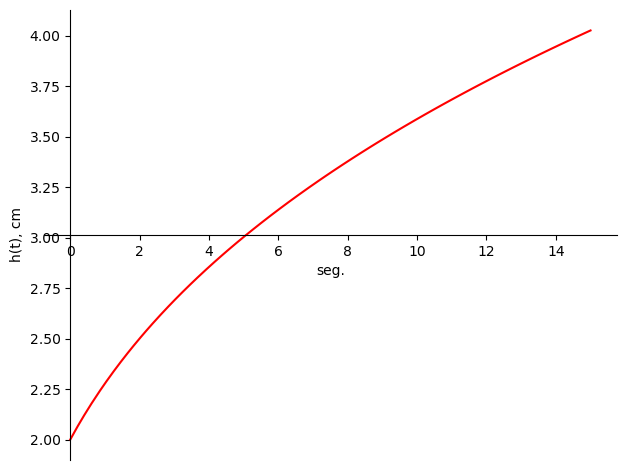

In [49]:
plot(SolucionEcuacion.rhs, (t,0,15),  line_color="red", ylabel="h(t), cm", xlabel ="seg.")